In [1]:
# CMSC320 Final - Tutorial
# Name: Lucas Cunningham

import pandas as pd
import matplotlib.pyplot as plt

import sklearn.metrics

## 1.  Introduction:

Cardiovascular Diseases (diseases involving the heart and pumping blood throughout the body)
are currently the most common cause of death around the world, accounting for almost 18 million 
deaths every year.  Additionally, there are several factors that could affect a person's chances 
to get cardiovascular diseases (abbreviated CVD).  This dataset taken from the UCI Machine 
Learning Repository contains several factors that could be related to CVD and whether the 
participants contracted the disease.  Today, we will be identifying which of these factors is
the best indicator of heart disease.  

## 2. Data Collection:

The dataset was compiled from 5 smaller datasets which originated from 
- Cleveland OH: 303 observations, 
- Hungary: 294 observations, 
- Switzerland: 123 observations, 
- Long Beach VA: 200 observations, 
- Stalog (Heart) Data Set: 270 observations

  
This dataset identified 11 factors for CVD:
1. Age (in years)
2. Sex ([M: Male, F: Female])
3. ChestPainType (type of chest pain -> [TA: Typical Angina \*1*, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic])
4. RestingBP (resting blood pressure in mmHg)
5. Cholesterol (in mg/dl)
6. FastingBS (fasting blood sugar -> [1: if fasting blood sugar > 120 mg/dl, 0: otherwise])
7. RestingECG (resting electrocardiogram results -> [Normal: Normal, ST: having ST-T wave abnomality \*2*, LVH: showing left ventricular hypertrophy \*3*])
8. MaxHR (Maximum heart rate in beats/min)
9. ExerciseAngina (did exercise induce an angina -> [Y: yes, N: no])
10. Oldpeak (ST depression \*4* in ecg results)
11. ST_Slope (slope of ST segment \*5* -> [Up: upsloping, Flat: flat, Down: downsloping])


As well as:
12. Heart Disease (1: has heart disease, 0: does not have heart disease)


In [2]:
# creating the dataframe
dataframe = pd.read_csv('heart_disease.csv')
print(dataframe.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


## 3. Cleaning the Data

In [3]:
# check that there are no NaN in the dataset
print(dataframe.isnull().sum().sum())

# removing rows with missing data (in the form of 0)
dataframe = dataframe.loc[dataframe.RestingBP> 60, :]
dataframe = dataframe.loc[dataframe.Cholesterol> 60, :]

0


Due to the definitely non-linear nature of the ChestPainType category, I have decided to remove it;

- Typical Angina: pain in the chest due to physical activity, 
- Atypical Angina: pain in the chest both during physical stress and rest, 
- Non-Anginal Pain: any other type of pain, 
- Asymptomatic: no pain at all

These have no clear progression or linearity, and thus I have removed this factor for the dataset.

For other information on chest pains, please refer to https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5680106/.


In [4]:
# removing columns that don't have clear metrics
dataframe = dataframe.drop(['ChestPainType'], axis=1)

Unlike the ChestPainType category, RestingECG has a potential linearity and thus will
be considered for potential linear relationships.

For the RestingECG category:

- Normal: having a normal ECG test
- ST: having a slight abnomality, but no physical deformation
- LVH: having a physical deformation of the heart, causing great abnomalities in a ECG test
For an image, please refer to https://www.vascularhealthclinics.org/wp-content/uploads/2019/12/Left-Ventricular-Hypertrophy.webp.

In [5]:
# replacing the RestingECG category with numerical values
dataframe["RestingECG"].replace({"Normal": 0, "ST": 1, "LVH": 2}, inplace=True)

For the ST_slope, while the slope of the ST segment (as seen here \*5*) does not have clear linearity, since both positive and negative slopes can cause cardiovascular diseases (as seen here \*6*), the relationship of ST segment / heart rate as a slope has been seen to yield better predictors of CVDs, and thus we will be replacing ST_slope with this new ratio.  For more information, please look here \*7*.


In [6]:
# removing columns that don't have clear metrics
dataframe["ST_Slope"] = dataframe["Oldpeak"] / dataframe["MaxHR"]

For the Sex and ExerciseAngina catergories, they only have 2 possible values, thus they must have a possible linear relationship, so we will be keeping them.

In [7]:
# replacing the Sex, ExerciseAngina categories with numerical values
dataframe["Sex"].replace({"M": 0, "F": 1}, inplace=True)

dataframe["ExerciseAngina"].replace({"Y": 0, "N": 1}, inplace=True)

## 4. Creating our Models

Now that we have a clean dataset, it is time to create linear regression models in hopes of finding a factor that accurately predicts cardiovascular diseases.

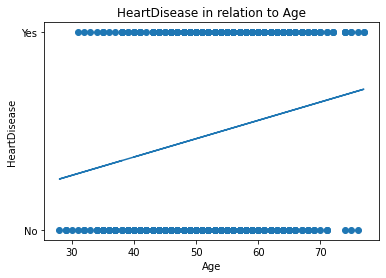

Slope = 0.009269961264932697
Intercept = -0.0020319348407037913
Accuracy = 0.47319


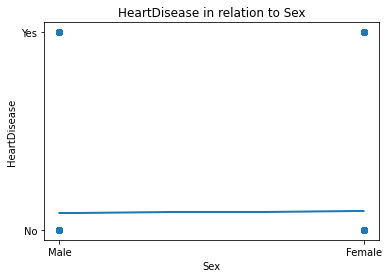

Slope = 0.008325072100236705
Intercept = 0.08629742913815051
Accuracy = 0.48228


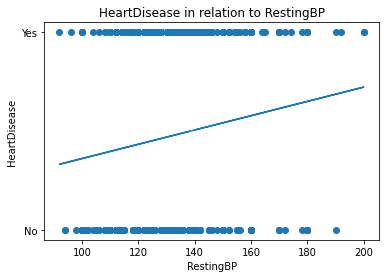

Slope = 0.0036154621170370895
Intercept = -0.0005997955257618828
Accuracy = 0.4883


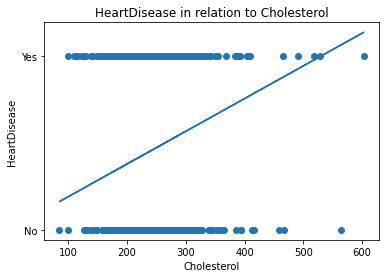

Slope = 0.001880352202268101
Intercept = 0.002887824804680534
Accuracy = 0.48714


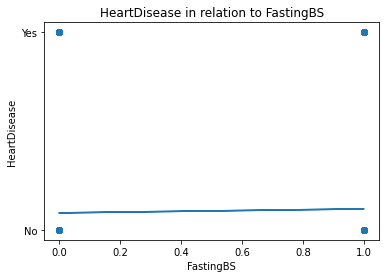

Slope = 0.020142626681863885
Intercept = 0.0861795401383347
Accuracy = 0.48009


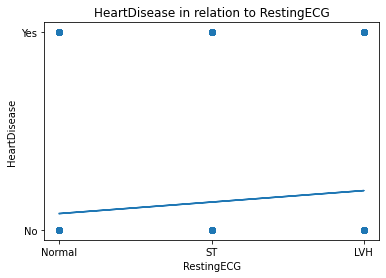

Slope = 0.058073254795750484
Intercept = 0.08280122222041482
Accuracy = 0.47717


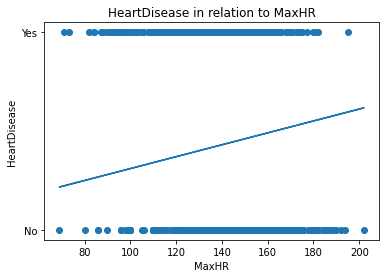

Slope = 0.0030106773329615644
Intercept = 0.00921289790712953
Accuracy = 0.52468


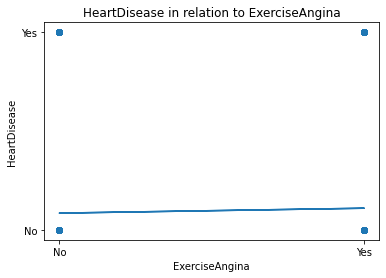

Slope = 0.024807428076062853
Intercept = 0.08495010119274606
Accuracy = 0.48843


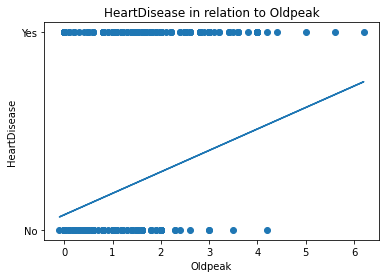

Slope = 0.10857454787509625
Intercept = 0.07657402357487522
Accuracy = 0.42752


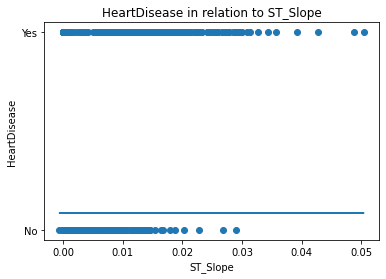

Slope = 0.0010507703941949407
Intercept = 0.08650390248272727
Accuracy = 0.48115
[0.47319, 0.48228, 0.4883, 0.48714, 0.48009, 0.47717, 0.52468, 0.48843, 0.42752, 0.48115]


In [8]:
# creating linear regressions
slope_intercept_pairs = []
accuracy_scores = []

for factor_pos in range(len(dataframe.columns)-1):

    x_data = dataframe.iloc[:, factor_pos]
    y_data = dataframe.iloc[:, len(dataframe.columns)-1]
    plt.scatter(x_data, y_data)

    test_slope = 0
    test_intercept = 0

    learning_rate = 0.00001
    iterations = 10000

    num_of_data_points = float(len(x_data))

    # Linear Gradient Descent 
    for i in range(iterations): 
        y_pred = test_slope * x_data + test_intercept
        derivative_of_slope = (-2 / num_of_data_points) * sum(x_data * (y_data - y_pred))  
        derivative_of_intercept = (-2 / num_of_data_points) * sum(y_data - y_pred)
        test_slope = test_slope - learning_rate * derivative_of_slope
        test_intercept = test_intercept - learning_rate * derivative_of_intercept

    slope_intercept_pair = (test_slope, test_intercept)
    slope_intercept_pairs.append(slope_intercept_pair)

    


    plt.title(dataframe.columns[-1] + " in relation to " + dataframe.columns[factor_pos])

    plt.xlabel(dataframe.columns[factor_pos])
    
    if dataframe.columns[factor_pos] == "Sex" :
        plt.xticks([0, 1], ["Male", "Female"])
    elif dataframe.columns[factor_pos] == "ExerciseAngina" :
        plt.xticks([0, 1], ["No", "Yes"])
    elif dataframe.columns[factor_pos] == "RestingECG" :
        plt.xticks([0, 1, 2], ["Normal", "ST", "LVH"])

    plt.ylabel(dataframe.columns[-1])
    plt.yticks([0, 1], ["No", "Yes"])

    plt.plot(x_data, test_slope * x_data + test_intercept)
    plt.show()
    plt.close()

    print("Slope = " + str(test_slope))
    print("Intercept = " + str(test_intercept))
    
    score = round(sklearn.metrics.mean_absolute_error(y_data, test_slope * x_data + test_intercept), 5)
    print("Accuracy = " + str(score))
    accuracy_scores.append(score)
    

#print(accuracy_scores)

## 5. Conclusion

As we can see from the accuracy scores above, ExerciseAngina is the best single predictor 
of heart disease, closely followed by Oldpeak and RestingBP.  Unfortunately, none of the 
individual factors were particularly good predictors, which makes sense since the human body is a complicated mechanism with a large room for variance.  Additionally, the sample size of the data set probably isn't large enough to make definitive statements.

Additionally, the new ST_Slope ratio that we calculated (ST segment / heart rate as a slope),
performed worse than expected which possibly due to, while there is a relation (see here \*7*), 
it may not be a linear one, and thus is not displayed well in this project.

However, from the graphs, we can easily see that factors like cholesterol levels, resting
blood pressure, and blood sugar levels are clear indicators of heart disease, yet another
reminder to everyone to eat your fruits and vegetables and to exercise as regularly as you
can.

For additional information on ways to prevent cardiovascular diseases as well as helpful 
information/graphs explaining the factors used in this dataset, please use the links below!

## 6. Other Resources/Links

Eating and Health: https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/heart-disease-and-food#heart-disease
Exercise and Health: https://medlineplus.gov/ency/patientinstructions/000094.htm

\*1* Angina is a chest pain caused by reduced blood flow to the heart (Oxford Dict.)

\*2* ST-T wave abnormality is being defined as T wave inversions and/or ST elevation or depression of > 0.05 mV

\*3* Left Ventricular Hypertrophy is the thickening of the heart wall which tightens the muscle and
    may lead to the heart not being able to pump sufficient blood.  
    For more information, refer to https://www.mayoclinic.org/diseases-conditions/left-ventricular-hypertrophy/symptoms-causes/syc-20374314

\*4* Refer to: https://www.cvphysiology.com/uploads/images/CAD012%20ST%20elevation.png

\*5* Refer to: https://litfl.com/wp-content/uploads/2018/10/ST-segment-depression-upsloping-downsloping-horizontal.png

\*6* For more information, please see https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4958709/

\*7* For more information, please see https://pubmed.ncbi.nlm.nih.gov/3739881/

Data Taken from https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1?select=heart.csv

